In [1]:
import pandas as pd

In [2]:
file_path = r"C:\Users\Acer\Desktop\Data Sci Assignments\Random Forest\glass.xlsx"
data = pd.read_excel(file_path, sheet_name='glass')


In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# Display basic information about the dataset
print(data.info())

# Display basic statistical summary
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.

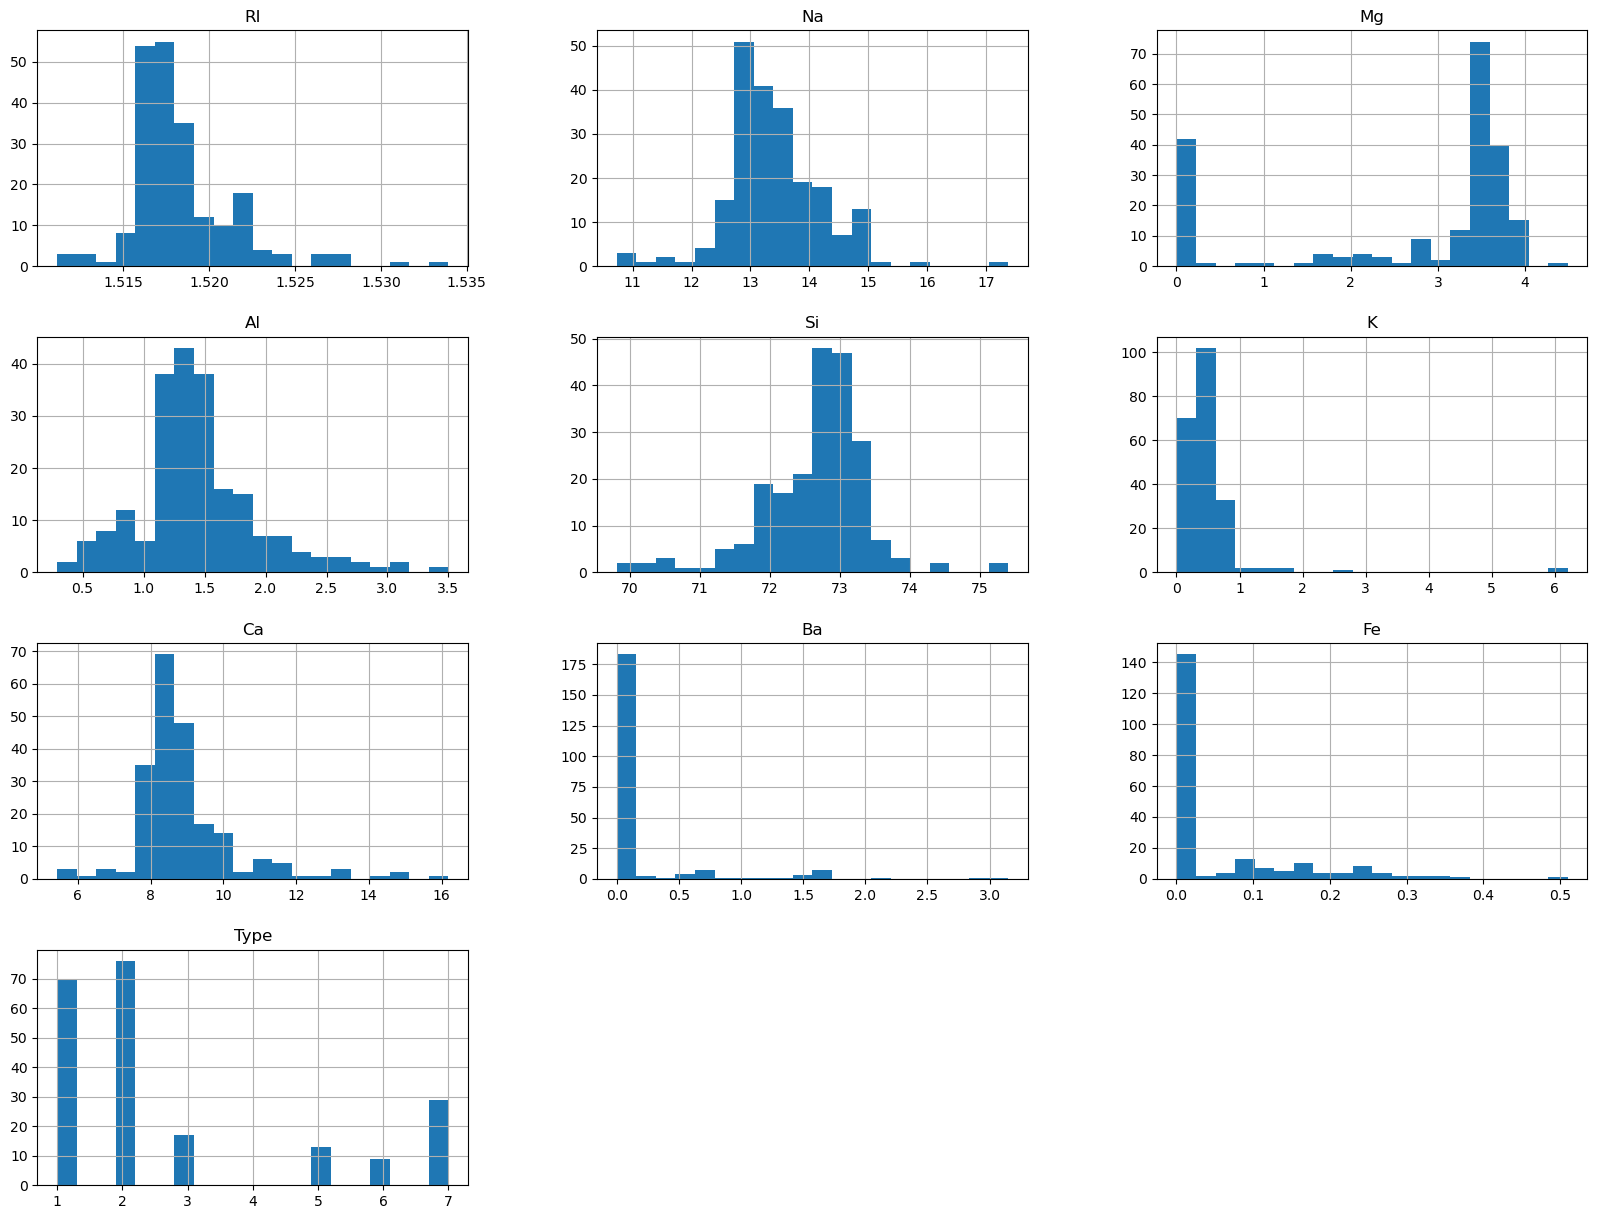

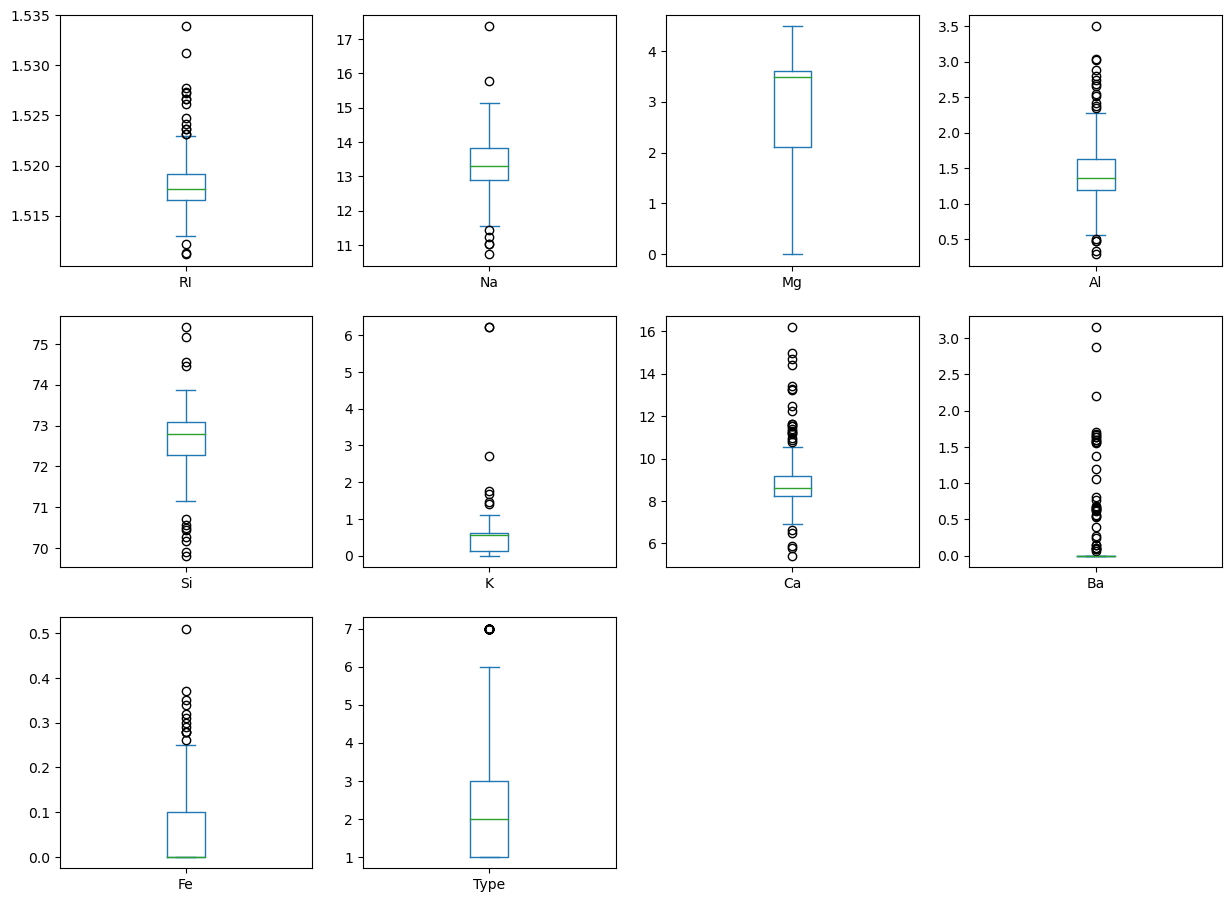

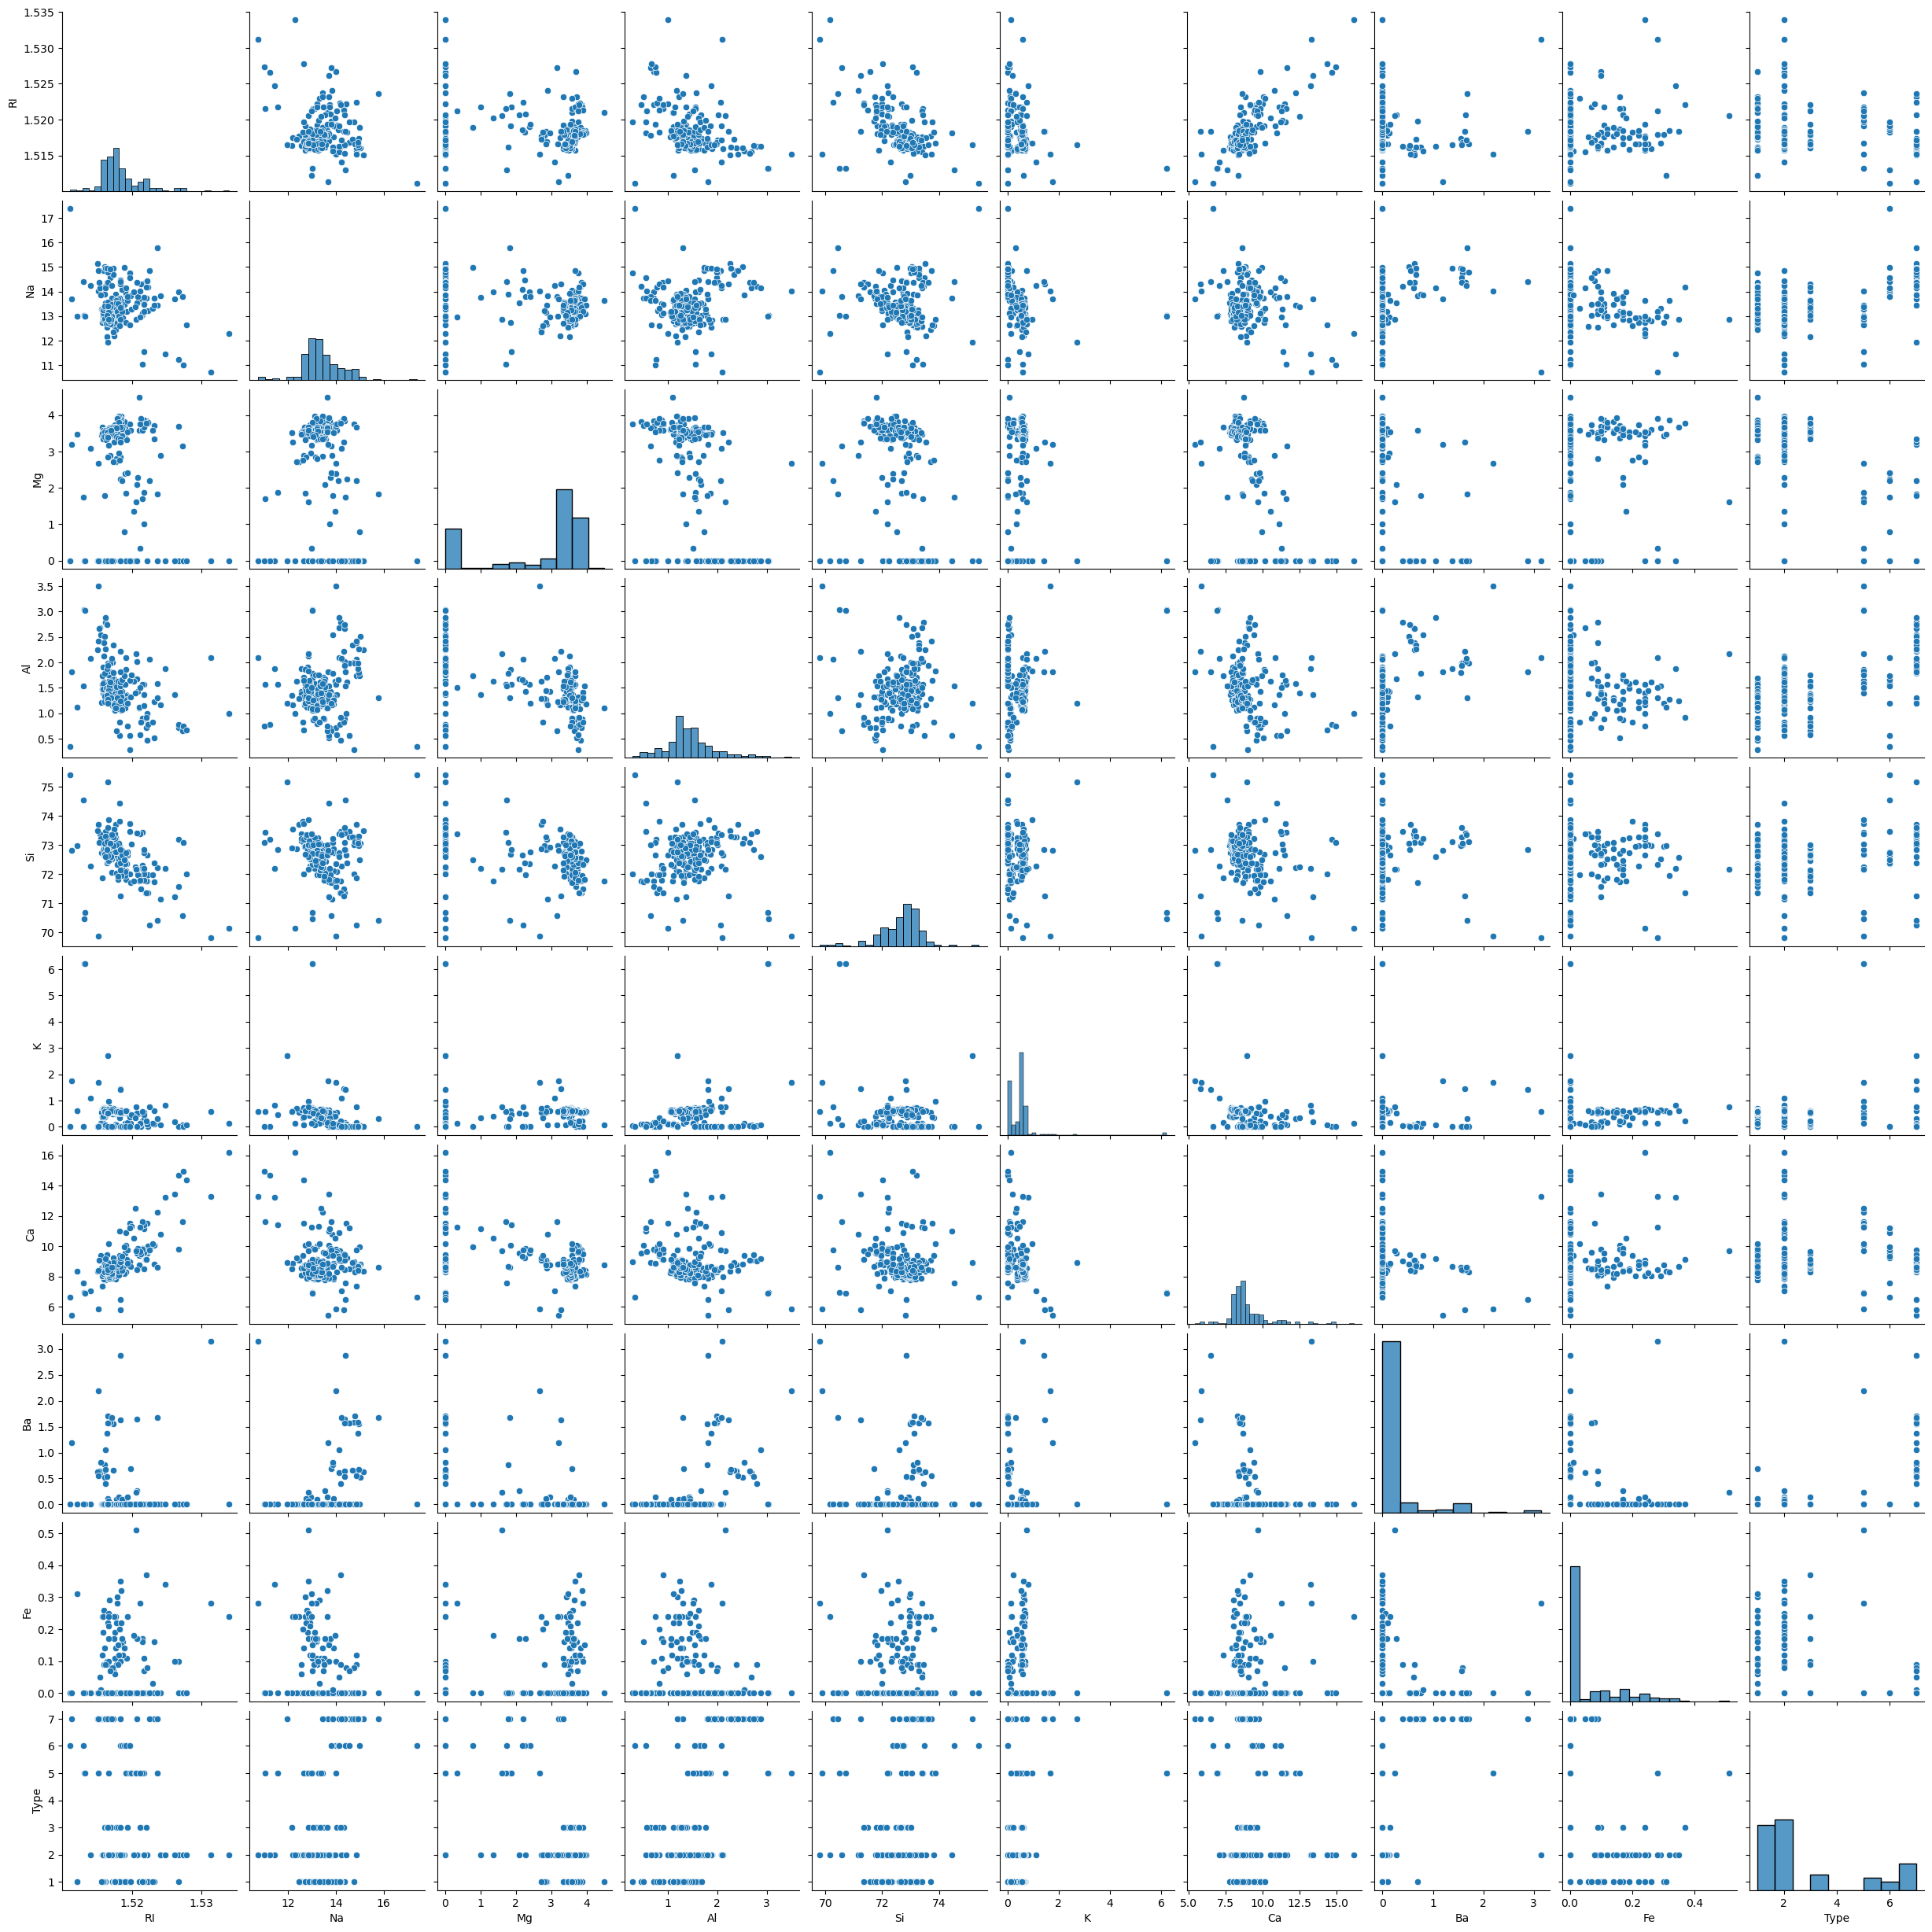

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
data.hist(bins=20, figsize=(20, 15))
plt.show()

# Box plots
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15, 15), sharex=False, sharey=False)
plt.show()

# Pair plots
sns.pairplot(data)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Type' is the target variable and others are features
X = data.drop('Type', axis=1)
y = data['Type']

# Handle missing values if any
X.fillna(X.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


Accuracy: 0.8372093023255814
Precision: 0.866828165374677
Recall: 0.8372093023255814
F1-score: 0.8330452594474481


In [8]:
from sklearn.ensemble import BaggingClassifier

# Initialize Bagging classifier
bagging_classifier = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)

# Train the model
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print(f'Bagging Accuracy: {accuracy_bagging}')
print(f'Bagging Precision: {precision_bagging}')
print(f'Bagging Recall: {recall_bagging}')
print(f'Bagging F1-score: {f1_bagging}')


Bagging Accuracy: 0.8604651162790697
Bagging Precision: 0.8816935002981515
Bagging Recall: 0.8604651162790697
Bagging F1-score: 0.855389915855032


In [9]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost classifier
boosting_classifier = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=50, random_state=42)

# Train the model
boosting_classifier.fit(X_train, y_train)

# Make predictions
y_pred_boosting = boosting_classifier.predict(X_test)

# Evaluate the model
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

print(f'Boosting Accuracy: {accuracy_boosting}')
print(f'Boosting Precision: {precision_boosting}')
print(f'Boosting Recall: {recall_boosting}')
print(f'Boosting F1-score: {f1_boosting}')


Boosting Accuracy: 0.8372093023255814
Boosting Precision: 0.8469915097822075
Boosting Recall: 0.8372093023255814
Boosting F1-score: 0.828960679083798


In [10]:
##Bagging vs. Boosting:

#Bagging: Reduces variance, averages multiple models.
#Boosting: Reduces variance and bias, sequentially improves models.

##Handling Imbalanced Data:

#Use oversampling, undersampling, or SMOTE.
#Evaluate with precision, recall, and F1-score over accuracy.
